# Importing Necessary Libraries!

In [289]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Data Preprocessing!

In [2]:
df = pd.read_csv('Advertising.csv')
print(df.shape)
df.head()

(200, 5)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [293]:
df.drop('Unnamed: 0',axis=1, inplace=True) #Removing the unnecessary ID column as we're already provided with a default row number.

In [294]:
df.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isna().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [8]:
df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

# Data Visualization!

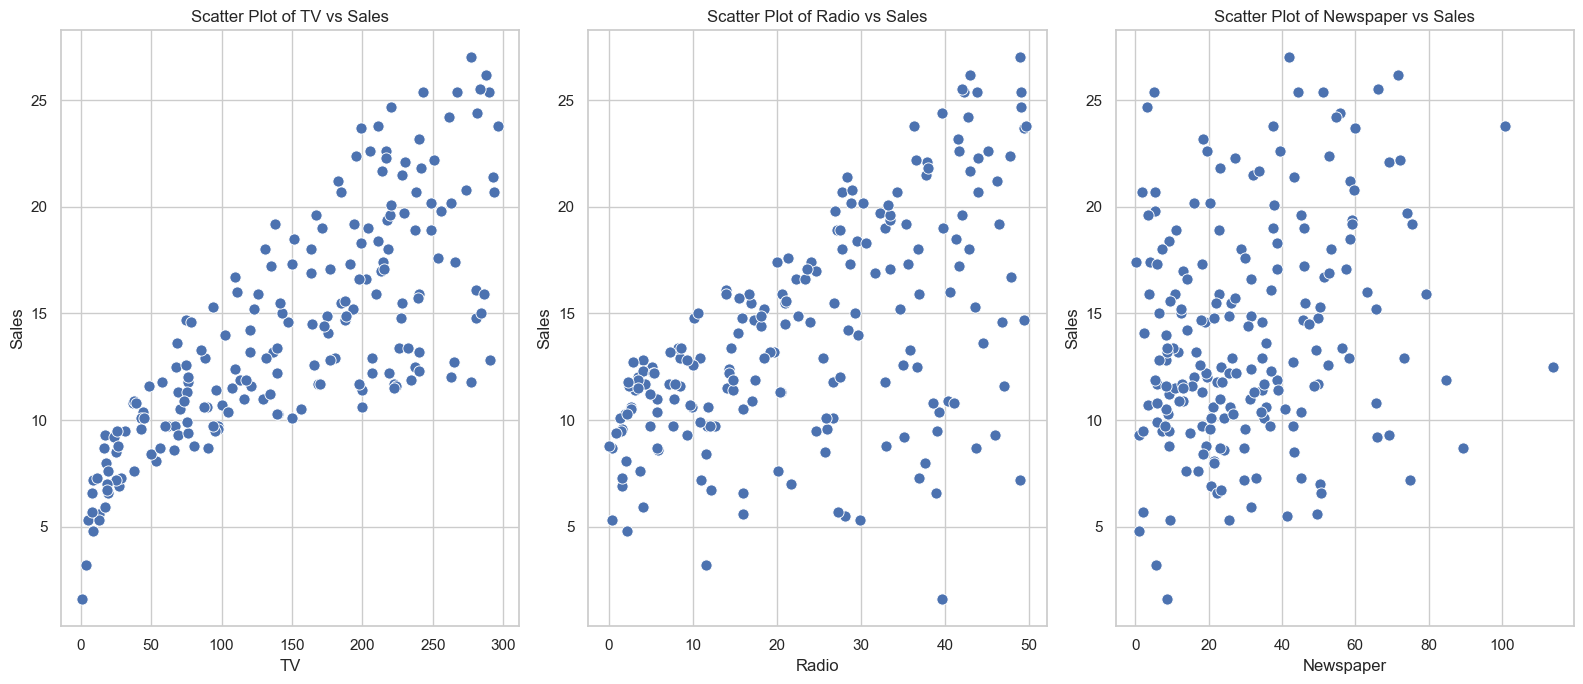

In [10]:
sns.set(style="whitegrid")
combos = ['TV', 'Radio', 'Newspaper']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,7))

for i, combo in enumerate(combos):
    sns.scatterplot(x=df[combo], y=df['Sales'], data=df, s=65, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {combo} vs Sales')
    axes[i].set_xlabel(combo)
    axes[i].set_ylabel('Sales')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#Graphs to understand the relationship with The advertising costs and the resulting sales
#Clearly TVs have an almost linear relationship

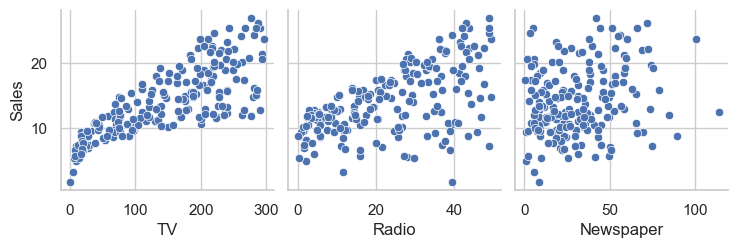

In [11]:
#Drawing the same graph using pairplot
sns.pairplot(x_vars=combos,y_vars='Sales',data=df) #Another way of representing the above graph

<Axes: >

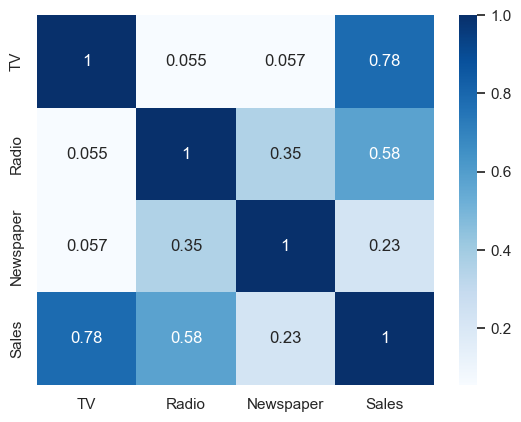

In [15]:
#Plotting the heatmap of a correlation matrix
sns.heatmap(df.corr(), cmap='Blues',annot=True)

# Dataset Scaling and Model Training!

In [ ]:
# Splitting the data into training and testing sets
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

In [226]:
# Initializing StandardScaler
scaler = StandardScaler()

# Fitting and transforming the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [201]:
# Creating and training a Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_reg_model.predict(X_test_scaled)

In [291]:
# Evaluating the regression model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print('Root Mean Squared Error:',np.sqrt(mse))
print('R-Squared: ',r2_score(y_test,y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_pred,y_test))

Mean Squared Error: 1.8492923424514907
Root Mean Squared Error: 1.3598868859031954
R-Squared:  0.9440667299574067
Mean Absolute Error:  1.1443969922114707


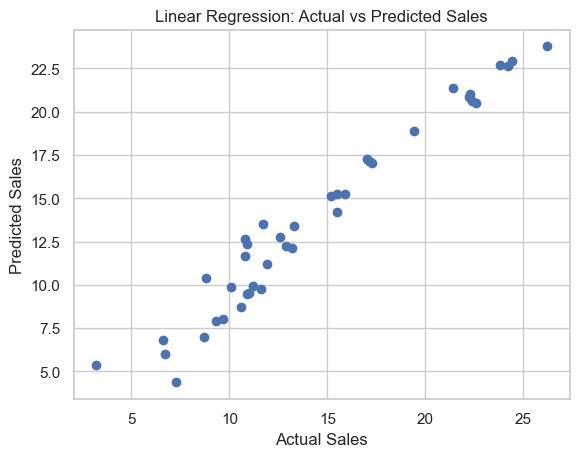

In [286]:
# Visualizing the predictions vs actual values
plt.scatter(y_test, y_pred) #X-axis has the actual sales, and Y-axis has the predicted value
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.show()